In [1]:
conda install beautifulsoup4 requests lxml html5lib

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
#impoty libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
from IPython.core.display import display, HTML
import re

In [5]:
#site to grab nba player salaries
url = 'http://www.espn.com/nba/salaries'
response = requests.get(url)

In [6]:
response.status_code

200

In [7]:
page = response.text

In [8]:
soup = BeautifulSoup(page, "lxml")

In [9]:
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="https://www.facebook.com/2008/fbml">
 <head>
  <script>
   (function redirectToHttpIfHttps() {
   var win      = typeof window !== 'undefined' && window,
       location = win && win.location,
       protocol = location && location.protocol;

   if (protocol === 'https:') {
        location.href = location.href.replace('https://', 'http://');
   }
})();
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://a.espncdn.com/favicon.ico" mask="" rel="icon" sizes="any"/>
  <meta content="#CC0000" name="theme-color"/>
  <script type="text/javascript">
   if(true && navigator && navigator.userAgent.toLowerCase().indexOf("teamstream") >= 0) {
        window.location = 'http://m.espn.com/mobilecache/general/apps/sc';
    }
  </script>
  <title>
   NBA Player Salaries - National Basketball Association - ESPN
  </title>
  <meta content="xuj1ODRluWa0frM-BjIr_aSHoUC7HB5C1MgmYAM_GkA" name="google-s

In [10]:
#Players/ Salaries are stored in the tag 'td'
soup.find_all('td')

[<td width="10%">RK</td>,
 <td width="35%">NAME</td>,
 <td width="35%">TEAM</td>,
 <td style="text-align:right;" width="20%">SALARY</td>,
 <td>1</td>,
 <td><a href="http://www.espn.com/nba/player/_/id/3975/stephen-curry">Stephen Curry</a>, PG</td>,
 <td><a href="http://www.espn.com/nba/team/_/name/gs/golden-state-warriors">Golden State Warriors</a></td>,
 <td style="text-align:right;">$40,231,758</td>,
 <td>2</td>,
 <td><a href="http://www.espn.com/nba/player/_/id/2779/chris-paul">Chris Paul</a>, PG</td>,
 <td><a href="http://www.espn.com/nba/team/_/name/okc/oklahoma-city-thunder">Oklahoma City Thunder</a></td>,
 <td style="text-align:right;">$38,506,482</td>,
 <td>3</td>,
 <td><a href="http://www.espn.com/nba/player/_/id/3468/russell-westbrook">Russell Westbrook</a>, PG</td>,
 <td><a href="http://www.espn.com/nba/team/_/name/hou/houston-rockets">Houston Rockets</a></td>,
 <td style="text-align:right;">$38,506,482</td>,
 <td>4</td>,
 <td><a href="http://www.espn.com/nba/player/_/id/423

In [11]:
#Find the salary of players

players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')}) #players are sorted in even and odd rows
salary_list = []
for player in players:
    salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
    salary_list.append(salaries)
    print(salary_list)
    
    


[['$40,231,758']]
[['$40,231,758'], ['$38,506,482']]
[['$40,231,758'], ['$38,506,482'], ['$38,506,482']]
[['$40,231,758'], ['$38,506,482'], ['$38,506,482'], ['$38,199,000']]
[['$40,231,758'], ['$38,506,482'], ['$38,506,482'], ['$38,199,000'], ['$38,199,000']]
[['$40,231,758'], ['$38,506,482'], ['$38,506,482'], ['$38,199,000'], ['$38,199,000'], ['$38,199,000']]
[['$40,231,758'], ['$38,506,482'], ['$38,506,482'], ['$38,199,000'], ['$38,199,000'], ['$38,199,000'], ['$37,436,858']]
[['$40,231,758'], ['$38,506,482'], ['$38,506,482'], ['$38,199,000'], ['$38,199,000'], ['$38,199,000'], ['$37,436,858'], ['$34,996,296']]
[['$40,231,758'], ['$38,506,482'], ['$38,506,482'], ['$38,199,000'], ['$38,199,000'], ['$38,199,000'], ['$37,436,858'], ['$34,996,296'], ['$34,449,964']]
[['$40,231,758'], ['$38,506,482'], ['$38,506,482'], ['$38,199,000'], ['$38,199,000'], ['$38,199,000'], ['$37,436,858'], ['$34,996,296'], ['$34,449,964'], ['$32,742,000']]
[['$40,231,758'], ['$38,506,482'], ['$38,506,482'], ['$

In [12]:
# Find all the Name of players
name_list = []

for player in players:
    player_name = [name.get_text() for name in player.find_all('a')]
    name_list.append(player_name[0])
    #team_name = [name.get_text() for name in player.find_all('a')]
    print(name_list)

['Stephen Curry']
['Stephen Curry', 'Chris Paul']
['Stephen Curry', 'Chris Paul', 'Russell Westbrook']
['Stephen Curry', 'Chris Paul', 'Russell Westbrook', 'John Wall']
['Stephen Curry', 'Chris Paul', 'Russell Westbrook', 'John Wall', 'Kevin Durant']
['Stephen Curry', 'Chris Paul', 'Russell Westbrook', 'John Wall', 'Kevin Durant', 'James Harden']
['Stephen Curry', 'Chris Paul', 'Russell Westbrook', 'John Wall', 'Kevin Durant', 'James Harden', 'LeBron James']
['Stephen Curry', 'Chris Paul', 'Russell Westbrook', 'John Wall', 'Kevin Durant', 'James Harden', 'LeBron James', 'Kyle Lowry']
['Stephen Curry', 'Chris Paul', 'Russell Westbrook', 'John Wall', 'Kevin Durant', 'James Harden', 'LeBron James', 'Kyle Lowry', 'Blake Griffin']
['Stephen Curry', 'Chris Paul', 'Russell Westbrook', 'John Wall', 'Kevin Durant', 'James Harden', 'LeBron James', 'Kyle Lowry', 'Blake Griffin', 'Tobias Harris']
['Stephen Curry', 'Chris Paul', 'Russell Westbrook', 'John Wall', 'Kevin Durant', 'James Harden', 'LeB

In [13]:
columns = ['Name', 'Salary']

In [14]:
# create data frame with name and salary
df_name = pd.DataFrame(np.array(name_list))


In [15]:
df_salaries = pd.DataFrame(np.array(salary_list), columns=['salary'])

In [16]:
# Find the season (what year)
soup.find('h4').text[0:9]
nba_year = {'Year':soup.find('h4').text[0:9]}


In [17]:
## Automate scrapping through 10 years worth of salaries for players.
## This will take a long time. Uncomment to run or run individual cells below. 


# salary_list = []   
# name_list = []

# for yr in range(2008, 2019, 1):

#     page_url = 'http://www.espn.com/nba/salaries/_/year/' + str(yr) + '/page/'


#     for pg in range(2, 14, 1):

#         new_page_url = page_url + str(pg) 
#         url = new_page_url
#         response = requests.get(url)
#         page = response.text
#         soup = BeautifulSoup(page, "lxml")

#         players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})



#         for player in players:
#             salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
#             salary_list.append(salaries)




#         for player in players:
#             player_name = [name.get_text() for name in player.find_all('a')]
#             name_list.append(player_name[0])
#             #team_name = [name.get_text() for name in player.find_all('a')]


#     df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
#     df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary'])


#     final_df = pd.concat([df_name, df_salaries], axis=1)
#     final_df['Year'] = soup.find('h4').text[0:9]



KeyboardInterrupt: 

In [18]:
salary_list = []   
name_list = []

for pg in range(1, 14, 1): #salaries are split into 14pages. Need to grab data from all 14pages

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2008/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)

        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]

            df_name = pd.DataFrame(np.array(name_list), columns=['Name']) #create df for name 
            df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int) #create df for salaries

            final_df08 = pd.concat([df_name, df_salaries], axis=1) #combine the name and salary df
            final_df08['Year'] = soup.find('h4').text[7:9] #include the season
            final_df08['Cap_Space'] = 55_630_000 #cap space of that year



In [19]:
salary_list = []   
name_list = []

for pg in range(1, 14, 1):

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2009/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)

        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]

        df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
        df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int)

        final_df09 = pd.concat([df_name, df_salaries], axis=1)
        final_df09['Year'] = soup.find('h4').text[7:9]
        final_df09['Cap_Space'] = 58680000



In [20]:
salary_list = []   
name_list = []

for pg in range(1, 14, 1):

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2010/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)

        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]

        df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
        df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int)

        final_df10 = pd.concat([df_name, df_salaries], axis=1)
        final_df10['Year'] = soup.find('h4').text[7:9]
        final_df10['Cap_Space'] = 57700000

In [21]:
salary_list = []   
name_list = []

for pg in range(1, 14, 1):

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2011/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)

        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]

        df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
        df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int)


        final_df11 = pd.concat([df_name, df_salaries], axis=1)
        final_df11['Year'] = soup.find('h4').text[7:9]
        final_df11['Cap_Space'] = 58044000

In [22]:
salary_list = []   
name_list = []

for pg in range(1, 14, 1):

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2012/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)

        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]

        df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
        df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int)

        final_df12 = pd.concat([df_name, df_salaries], axis=1)
        final_df12['Year'] = soup.find('h4').text[7:9]
        final_df12['Cap_Space'] = 58044000

In [23]:
salary_list = []   
name_list = []

for pg in range(1, 14, 1):

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2013/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)

        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]

        df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
        df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int)

        final_df13 = pd.concat([df_name, df_salaries], axis=1)
        final_df13['Year'] = soup.find('h4').text[7:9]
        final_df13['Cap_Space'] = 58044000

In [24]:
salary_list = []   
name_list = []

for pg in range(1, 14, 1):

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2014/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)

        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]

        df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
        df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int)

        final_df14 = pd.concat([df_name, df_salaries], axis=1)
        final_df14['Year'] = soup.find('h4').text[7:9]
        final_df14['Cap_Space'] = 58679000

In [25]:
salary_list = []   
name_list = []

for pg in range(1, 14, 1):

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2015/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)

        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]

        df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
        df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int)

        final_df15 = pd.concat([df_name, df_salaries], axis=1)
        final_df15['Year'] = soup.find('h4').text[7:9]
        final_df15['Cap_Space'] = 63065000

In [26]:
salary_list = []   
name_list = []

for pg in range(1, 14, 1):

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2016/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)

        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]

        df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
        df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int)

        final_df16 = pd.concat([df_name, df_salaries], axis=1)
        final_df16['Year'] = soup.find('h4').text[7:9]
        final_df16['Cap_Space'] = 70_000_000

In [27]:
salary_list = []   
name_list = []

for pg in range(1, 14, 1):

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2017/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)
            
        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]

        df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
        df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int)

        final_df17 = pd.concat([df_name, df_salaries], axis=1)
        final_df17['Year'] = soup.find('h4').text[7:9]
        final_df17['Cap_Space'] = 94_143_000

In [28]:
salary_list = []   
name_list = []



for pg in range(1, 14, 1):

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2018/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)
            
        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]

        df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
        df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int)

        final_df18 = pd.concat([df_name, df_salaries], axis=1)
        final_df18['Year'] = soup.find('h4').text[7:9]
        final_df18['Cap_Space'] = 99_093_000
        

In [29]:
salary_list = []   
name_list = []



for pg in range(1, 14, 1):

        new_page_url = 'http://www.espn.com/nba/salaries/_/year/2019/page/' + str(pg) 
        url = new_page_url
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, "lxml")

        players = soup.find_all('tr', attrs={'class':re.compile('evenrow|oddrow')})

        for player in players:
            
            salaries = [salary.get_text() for salary in player.find_all('td', attrs = {'style': 'text-align:right;'})]
            salaries_clean = [sal.replace('$','').replace(',', '')for sal in salaries]
            salary_list.append(salaries_clean)
        
        for player in players:
            player_name = [name.get_text() for name in player.find_all('a')]
            name_list.append(player_name[0])
            #team_name = [name.get_text() for name in player.find_all('a')]
            
        df_name = pd.DataFrame(np.array(name_list), columns=['Name'])
        df_salaries = pd.DataFrame(np.array(salary_list), columns=['Salary']).astype(int)

        final_df19 = pd.concat([df_name, df_salaries], axis=1)
        final_df19['Year'] = soup.find('h4').text[7:9]
        final_df19['Cap_Space'] = 109_140_000
        

In [30]:
#Combine all the df with name, salaries, year, cap space together
frames = [final_df08, final_df09, final_df10, final_df11, final_df12, final_df13, final_df14
         , final_df15, final_df16, final_df17, final_df18, final_df19]

In [31]:
final_data = pd.concat(frames)

In [32]:
final_data.tail()

Name  Salary Year  Cap_Space
498  Jonathan Gibson   17092   19  109140000
499    Tarik Phillip    9474   19  109140000
500  Duncan Robinson    9474   19  109140000
501      Theo Pinson    4737   19  109140000
502    Kendrick Nunn    4737   19  109140000

In [33]:
final_data.dtypes

Name         object
Salary        int64
Year         object
Cap_Space     int64
dtype: object

In [34]:
#Since Cap space changes every year, the salary of a player will change as well. It makes more sense to evaluate using the Percent Cap Space each player takes. 

final_data['Pct_Cap'] = final_data.Salary / final_data.Cap_Space

In [35]:
final_data  


Name    Salary Year  Cap_Space   Pct_Cap
0       Kevin Garnett  23751934   08   55630000  0.426963
1    Shaquille O'Neal  21000000   08   55630000  0.377494
2          Jason Kidd  19728000   08   55630000  0.354629
3     Jermaine O'Neal  19728000   08   55630000  0.354629
4         Kobe Bryant  19490625   08   55630000  0.350362
..                ...       ...  ...        ...       ...
498   Jonathan Gibson     17092   19  109140000  0.000157
499     Tarik Phillip      9474   19  109140000  0.000087
500   Duncan Robinson      9474   19  109140000  0.000087
501       Theo Pinson      4737   19  109140000  0.000043
502     Kendrick Nunn      4737   19  109140000  0.000043

[6035 rows x 5 columns]

In [36]:
# Start scrapping basketball reference

url_bbr = 'https://www.basketball-reference.com/leagues/NBA_2008_per_game.html'
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")

In [37]:
response.status_code

200

In [38]:
# Grab all the headers of the table 

headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]

In [39]:
# We don't need the rank of the player so don't include that
headers = headers[1:]

In [41]:
#'tr' tag is the start of the table. get all the text from all the rows. 

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

In [42]:
# Create df of all the stats

stats = pd.DataFrame(player_stats, columns = headers)

In [43]:
stats

Player Pos Age   Tm   G  GS    MP   FG  FGA   FG%  ...  \
0    Shareef Abdur-Rahim  PF  31  SAC   6   0   8.5  0.5  2.3  .214  ...   
1          Arron Afflalo  SG  22  DET  75   9  12.9  1.3  3.2  .411  ...   
2           Maurice Ager  SG  23  TOT  26   3   6.3  0.8  2.5  .323  ...   
3           Maurice Ager  SG  23  DAL  12   3   6.4  0.4  2.3  .185  ...   
4           Maurice Ager  SG  23  NJN  14   0   6.3  1.1  2.7  .421  ...   
..                   ...  ..  ..  ...  ..  ..   ...  ...  ...   ...  ...   
612      Lorenzen Wright   C  32  TOT  18   1   8.9  0.3  1.2  .286  ...   
613      Lorenzen Wright   C  32  ATL  13   1  11.4  0.4  1.3  .294  ...   
614      Lorenzen Wright   C  32  SAC   5   0   2.6  0.2  0.8  .250  ...   
615           Nick Young  SG  22  WAS  75   2  15.4  2.8  6.4  .439  ...   
616       Thaddeus Young  PF  19  PHI  74  22  21.0  3.6  6.6  .539  ...   

       FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PTS  
0    1.000  1.0  0.7  1.7  0.7  0.2  0.0  0.2  1.5  1.7  
1     .782  0.5  1.3  1.8  0.7  0.4  0.1  0.5  1.1  3.7  
2     .500  0.2  0.3  0.5  0.3  0.0  0.0  0.2  0.7  2.0  
3     .833  0.1  0.3  0.3  0.3  0.0  0.1  0.3  0.9  1.3  
4     .167  0.2  0.4  0.6  0.3  0.0  0.0  0.2  0.4  2.6  
..     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
612   .500  0.4  1.7  2.1  0.2  0.2  0.2  0.2  1.7  0.8  
613   .500  0.5  2.3  2.8  0.2  0.2  0.2  0.2  2.0  1.0  
614         0.2  0.0  0.2  0.2  0.0  0.0  0.4  1.0  0.4  
615   .815  0.3  1.2  1.5  0.8  0.5  0.1  1.3  1.7  7.5  
616   .738  1.6  2.6  4.2  0.8  1.0  0.1  0.9  1.7  8.2  

[617 rows x 29 columns]

In [44]:
#start grabbing stats for each year dating back to 2008

url_bbr = "https://www.basketball-reference.com/leagues/NBA_2008_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]

stats_df08 = pd.DataFrame(player_stats, columns = headers)
stats_df08['Year'] = year
stats_df08 = stats_df08.drop_duplicates(subset='Player', keep='first')



In [45]:

url_bbr = "https://www.basketball-reference.com/leagues/NBA_2009_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]

stats_df09 = pd.DataFrame(player_stats, columns = headers)
stats_df09['Year'] = year
stats_df09 = stats_df09.drop_duplicates(subset='Player', keep='first')


In [46]:
url_bbr = "https://www.basketball-reference.com/leagues/NBA_2010_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]

stats_df10 = pd.DataFrame(player_stats, columns = headers)
stats_df10['Year'] = year
stats_df10 = stats_df10.drop_duplicates(subset='Player', keep='first')


In [47]:
url_bbr = "https://www.basketball-reference.com/leagues/NBA_2011_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]

stats_df11 = pd.DataFrame(player_stats, columns = headers)
stats_df11['Year'] = year
stats_df11 = stats_df11.drop_duplicates(subset='Player', keep='first')


In [48]:
url_bbr = "https://www.basketball-reference.com/leagues/NBA_2012_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]

stats_df12 = pd.DataFrame(player_stats, columns = headers)
stats_df12['Year'] = year
stats_df12 = stats_df12.drop_duplicates(subset='Player', keep='first')


In [49]:
url_bbr = "https://www.basketball-reference.com/leagues/NBA_2013_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]

stats_df13 = pd.DataFrame(player_stats, columns = headers)
stats_df13['Year'] = year
stats_df13 = stats_df13.drop_duplicates(subset='Player', keep='first')


In [50]:
url_bbr = "https://www.basketball-reference.com/leagues/NBA_2014_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]

stats_df14 = pd.DataFrame(player_stats, columns = headers)
stats_df14['Year'] = year
stats_df14 = stats_df14.drop_duplicates(subset='Player', keep='first')


In [51]:
url_bbr = "https://www.basketball-reference.com/leagues/NBA_2015_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]

stats_df15 = pd.DataFrame(player_stats, columns = headers)
stats_df15['Year'] = year
stats_df15 = stats_df15.drop_duplicates(subset='Player', keep='first')


In [52]:
url_bbr = "https://www.basketball-reference.com/leagues/NBA_2016_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]


stats_df16 = pd.DataFrame(player_stats, columns = headers)
stats_df16['Year'] = year
stats_df16 = stats_df16.drop_duplicates(subset='Player', keep='first')


In [53]:
url_bbr = "https://www.basketball-reference.com/leagues/NBA_2017_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]

stats_df17 = pd.DataFrame(player_stats, columns = headers)
stats_df17['Year'] = year
stats_df17 = stats_df17.drop_duplicates(subset='Player', keep='first')


In [54]:
url_bbr = "https://www.basketball-reference.com/leagues/NBA_2018_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]

stats_df18 = pd.DataFrame(player_stats, columns = headers)
stats_df18['Year'] = year
stats_df18 = stats_df18.drop_duplicates(subset='Player', keep='first')


In [55]:

url_bbr = "https://www.basketball-reference.com/leagues/NBA_2019_per_game.html"
response = requests.get(url_bbr)
page_bbr = response.text
soup_bbr = BeautifulSoup(page_bbr, "lxml")


headers = [th.get_text() for th in soup_bbr.find_all('tr', limit = 1)[0].find_all('th')]
headers = headers[1:]

rows = soup_bbr.find_all('tr')[1:]
player_stats = [[td.get_text() for td in rows[i].find_all('td')] for i in range(len(rows))]

year = soup_bbr.find('h1').text[6:8]


stats_df19 = pd.DataFrame(player_stats, columns = headers)
stats_df19['Year'] = soup_bbr.find('h1').text[6:8]
stats_df19 = stats_df19.drop_duplicates(subset='Player', keep='first')

In [236]:
# combine the df together
stats_frame = [stats_df08, stats_df09, stats_df10, stats_df11, stats_df12, stats_df13, stats_df14, stats_df15,
              stats_df16, stats_df17, stats_df18, stats_df19]

In [237]:
final_stats = pd.concat(stats_frame)

In [238]:
final_stats

Player Pos Age   Tm   G  GS    MP   FG   FGA   FG%  ...  \
0    Shareef Abdur-Rahim  PF  31  SAC   6   0   8.5  0.5   2.3  .214  ...   
1          Arron Afflalo  SG  22  DET  75   9  12.9  1.3   3.2  .411  ...   
2           Maurice Ager  SG  23  TOT  26   3   6.3  0.8   2.5  .323  ...   
5           Blake Ahearn  PG  23  MIA  12   0  14.8  1.3   4.8  .263  ...   
6      LaMarcus Aldridge  PF  22  POR  76  76  34.9  7.4  15.3  .484  ...   
..                   ...  ..  ..  ...  ..  ..   ...  ...   ...   ...  ...   
725           Trae Young  PG  20  ATL  81  81  30.9  6.5  15.5  .418  ...   
726          Cody Zeller   C  26  CHO  49  47  25.4  3.9   7.0  .551  ...   
727         Tyler Zeller   C  29  TOT   6   1  15.5  2.7   5.0  .533  ...   
730           Ante Žižić   C  22  CLE  59  25  18.3  3.1   5.6  .553  ...   
731          Ivica Zubac   C  21  TOT  59  37  17.6  3.6   6.4  .559  ...   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS Year  
0    1.0  0.7  1.7  0.7  0.2  0.0  0.2  1.5   1.7   08  
1    0.5  1.3  1.8  0.7  0.4  0.1  0.5  1.1   3.7   08  
2    0.2  0.3  0.5  0.3  0.0  0.0  0.2  0.7   2.0   08  
5    0.1  1.5  1.6  1.6  0.5  0.0  1.3  1.7   5.8   08  
6    2.9  4.7  7.6  1.6  0.7  1.2  1.7  3.2  17.8   08  
..   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  
725  0.8  2.9  3.7  8.1  0.9  0.2  3.8  1.7  19.1   19  
726  2.2  4.6  6.8  2.1  0.8  0.8  1.3  3.3  10.1   19  
727  1.8  2.2  4.0  0.7  0.2  0.5  0.7  3.3   7.7   19  
730  1.8  3.6  5.4  0.9  0.2  0.4  1.0  1.9   7.8   19  
731  1.9  4.2  6.1  1.1  0.2  0.9  1.2  2.3   8.9   19  

[5751 rows x 30 columns]

In [239]:
#rename the column so we can combine it with the salaries df

final_data.rename(columns = {'Name':'Player'}, inplace = True)

In [240]:
final_data

Player    Salary Year  Cap_Space   Pct_Cap
0       Kevin Garnett  23751934   08   55630000  0.426963
1    Shaquille O'Neal  21000000   08   55630000  0.377494
2          Jason Kidd  19728000   08   55630000  0.354629
3     Jermaine O'Neal  19728000   08   55630000  0.354629
4         Kobe Bryant  19490625   08   55630000  0.350362
..                ...       ...  ...        ...       ...
498   Jonathan Gibson     17092   19  109140000  0.000157
499     Tarik Phillip      9474   19  109140000  0.000087
500   Duncan Robinson      9474   19  109140000  0.000087
501       Theo Pinson      4737   19  109140000  0.000043
502     Kendrick Nunn      4737   19  109140000  0.000043

[6035 rows x 5 columns]

In [241]:
# Merging the two df toghter to have a complete df of stats and %salary cap

merge_data = pd.merge(final_data, final_stats, on=[ 'Player', 'Year',], how = 'inner')

In [242]:
merge_data

Player    Salary Year  Cap_Space   Pct_Cap Pos Age   Tm   G  \
0       Kevin Garnett  23751934   08   55630000  0.426963  PF  31  BOS  71   
1     Jermaine O'Neal  19728000   08   55630000  0.354629   C  29  IND  42   
2         Kobe Bryant  19490625   08   55630000  0.350362  SG  29  LAL  82   
3          Tim Duncan  19014188   08   55630000  0.341797   C  31  SAS  78   
4     Stephon Marbury  19012500   08   55630000  0.341767  PG  30  NYK  24   
...               ...       ...  ...        ...       ...  ..  ..  ...  ..   
4718      Yante Maten     18948   19  109140000  0.000174  PF  22  MIA   2   
4719    Eric Moreland     17092   19  109140000  0.000157  PF  27  TOT   5   
4720     Jordan McRae     17092   19  109140000  0.000157  SG  27  WAS  27   
4721  Duncan Robinson      9474   19  109140000  0.000087  PF  24  MIA  15   
4722      Theo Pinson      4737   19  109140000  0.000043  SG  23  BRK  18   

      GS  ...   FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0     71  ...  .801  1.9  7.3   9.2  3.4  1.4  1.3  1.9  2.3  18.8  
1     34  ...  .742  2.0  4.8   6.7  2.2  0.5  2.1  2.5  3.1  13.6  
2     82  ...  .840  1.1  5.2   6.3  5.4  1.8  0.5  3.1  2.8  28.3  
3     78  ...  .730  3.0  8.3  11.3  2.8  0.7  1.9  2.3  2.4  19.3  
4     19  ...  .716  0.7  1.8   2.5  4.7  0.9  0.1  2.0  2.4  13.9  
...   ..  ...   ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  
4718   0  ...        0.5  1.0   1.5  0.0  0.5  0.0  0.0  0.0   1.0  
4719   0  ...        0.8  3.2   4.0  0.8  0.2  0.2  1.0  1.8   1.4  
4720   0  ...  .800  0.2  1.3   1.5  1.1  0.5  0.3  0.6  1.0   5.9  
4721   1  ...  .667  0.1  1.1   1.3  0.3  0.3  0.0  0.3  0.7   3.3  
4722   0  ...  .864  0.2  1.8   2.0  1.2  0.3  0.0  1.0  0.8   4.5  

[4723 rows x 33 columns]

In [243]:
merge_data.columns

Index(['Player', 'Salary', 'Year', 'Cap_Space', 'Pct_Cap', 'Pos', 'Age', 'Tm',
       'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [244]:
# stats were stored in 'object' type and could not be used for mathematics. need to be converted to int or float
merge_data.dtypes

Player        object
Salary         int64
Year          object
Cap_Space      int64
Pct_Cap      float64
Pos           object
Age           object
Tm            object
G             object
GS            object
MP            object
FG            object
FGA           object
FG%           object
3P            object
3PA           object
3P%           object
2P            object
2PA           object
2P%           object
eFG%          object
FT            object
FTA           object
FT%           object
ORB           object
DRB           object
TRB           object
AST           object
STL           object
BLK           object
TOV           object
PF            object
PTS           object
dtype: object

In [245]:
#converting to int
merge_data['Age'] = merge_data['Age'].astype(str).astype(int)

In [246]:
#converting to float
merge_data['FG'] = merge_data['FG'].astype(float)

In [247]:
merge_data['FGA'] = merge_data['FGA'].astype(float)

In [248]:
merge_data['FG%'] = pd.to_numeric(merge_data['FG%'], errors = 'coerce')

In [249]:
merge_data['3P%'] = pd.to_numeric(merge_data['3P%'], errors = 'coerce')

In [250]:
merge_data['eFG%'] = pd.to_numeric(merge_data['eFG%'], errors = 'coerce')
merge_data['FT%'] = pd.to_numeric(merge_data['FT%'], errors = 'coerce')
merge_data['2P%'] = pd.to_numeric(merge_data['2P%'], errors = 'coerce')
merge_data['G'] = pd.to_numeric(merge_data['G'], errors = 'coerce')
merge_data[merge_data.columns[8:]] = merge_data[merge_data.columns[8:]].astype(float)

In [251]:
#removes any players that played less than 15 games
merge_data = merge_data[merge_data['G'] > 15]

In [252]:
# make the percentage cap in to a percentage
merge_data['Pct_Cap'] = 100 * merge_data['Pct_Cap']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [253]:
# take a quick look at the correlations between features
merge_data.corr()

Salary  Cap_Space   Pct_Cap       Age         G        GS  \
Salary     1.000000   0.209253  0.939508  0.262586  0.232774  0.511394   
Cap_Space  0.209253   1.000000 -0.030372 -0.029894  0.007599 -0.002305   
Pct_Cap    0.939508  -0.030372  1.000000  0.277600  0.240727  0.535531   
Age        0.262586  -0.029894  0.277600  1.000000 -0.030174  0.001555   
G          0.232774   0.007599  0.240727 -0.030174  1.000000  0.552002   
GS         0.511394  -0.002305  0.535531  0.001555  0.552002  1.000000   
MP         0.553544  -0.016496  0.592917  0.008300  0.580994  0.825188   
FG         0.613383   0.040112  0.636111 -0.044790  0.471496  0.736148   
FGA        0.592028   0.034696  0.614017 -0.040847  0.451632  0.713998   
FG%        0.173506   0.044688  0.174865 -0.032249  0.238495  0.227486   
3P         0.297860   0.200763  0.236800  0.056288  0.276480  0.340613   
3PA        0.305014   0.214023  0.242202  0.044829  0.267006  0.337680   
3P%        0.051883   0.104984  0.023980  0.046473  0.062494  0.065088   
2P         0.572281  -0.031373  0.620866 -0.071711  0.421779  0.693683   
2PA        0.558806  -0.066798  0.617300 -0.071726  0.408723  0.689191   
2P%        0.171490   0.188195  0.138227 -0.044206  0.241271  0.198333   
eFG%       0.180136   0.192614  0.142183  0.033840  0.309128  0.234579   
FT         0.553976  -0.025079  0.588078 -0.058266  0.348479  0.596742   
FTA        0.555958  -0.033007  0.593188 -0.077501  0.350075  0.607189   
FT%        0.143172   0.050454  0.136731  0.068454  0.218786  0.171743   
ORB        0.283317  -0.065045  0.316712 -0.062479  0.260070  0.401107   
DRB        0.547365   0.053356  0.562755  0.024857  0.404950  0.646617   
TRB        0.491106   0.017135  0.513286 -0.002892  0.379369  0.602082   
AST        0.415099   0.050119  0.413779  0.026969  0.295888  0.501760   
STL        0.389435   0.015627  0.400979 -0.041497  0.402394  0.608032   
BLK        0.284337  -0.010710  0.308212 -0.047600  0.217440  0.371967   
TOV        0.524605  -0.014848  0.551195 -0.062936  0.372705  0.644708   
PF         0.328420  -0.039110  0.359115 -0.038280  0.440351  0.568316   
PTS        0.615310   0.047739  0.632613 -0.039631  0.460331  0.720108   

                 MP        FG       FGA       FG%  ...       FT%       ORB  \
Salary     0.553544  0.613383  0.592028  0.173506  ...  0.143172  0.283317   
Cap_Space -0.016496  0.040112  0.034696  0.044688  ...  0.050454 -0.065045   
Pct_Cap    0.592917  0.636111  0.614017  0.174865  ...  0.136731  0.316712   
Age        0.008300 -0.044790 -0.040847 -0.032249  ...  0.068454 -0.062479   
G          0.580994  0.471496  0.451632  0.238495  ...  0.218786  0.260070   
GS         0.825188  0.736148  0.713998  0.227486  ...  0.171743  0.401107   
MP         1.000000  0.884559  0.889005  0.176464  ...  0.309993  0.361318   
FG         0.884559  1.000000  0.979309  0.250849  ...  0.323318  0.361580   
FGA        0.889005  0.979309  1.000000  0.086921  ...  0.378754  0.243607   
FG%        0.176464  0.250849  0.086921  1.000000  ... -0.187984  0.573395   
3P         0.502195  0.463353  0.561773 -0.277719  ...  0.454793 -0.339775   
3PA        0.511128  0.470838  0.581030 -0.327460  ...  0.454949 -0.351892   
3P%        0.154032  0.120099  0.178625 -0.224317  ...  0.316646 -0.390038   
2P         0.798104  0.941663  0.881406  0.385478  ...  0.188632  0.532849   
2PA        0.812142  0.941530  0.910489  0.270940  ...  0.225362  0.472202   
2P%        0.171473  0.231689  0.093184  0.861165  ... -0.116118  0.411073   
eFG%       0.244167  0.262055  0.143932  0.810386  ...  0.037817  0.282632   
FT         0.734872  0.847240  0.837981  0.180687  ...  0.324225  0.309088   
FTA        0.734084  0.840663  0.815220  0.246636  ...  0.205163  0.404583   
FT%        0.309993  0.323318  0.378754 -0.187984  ...  1.000000 -0.241997   
ORB        0.361318  0.361580  0.243607  0.573395  ... -0.241997  1.000000   
DRB        0.681805  0.670834  0.592741  0.431800  ...  0.003149  0.752570  

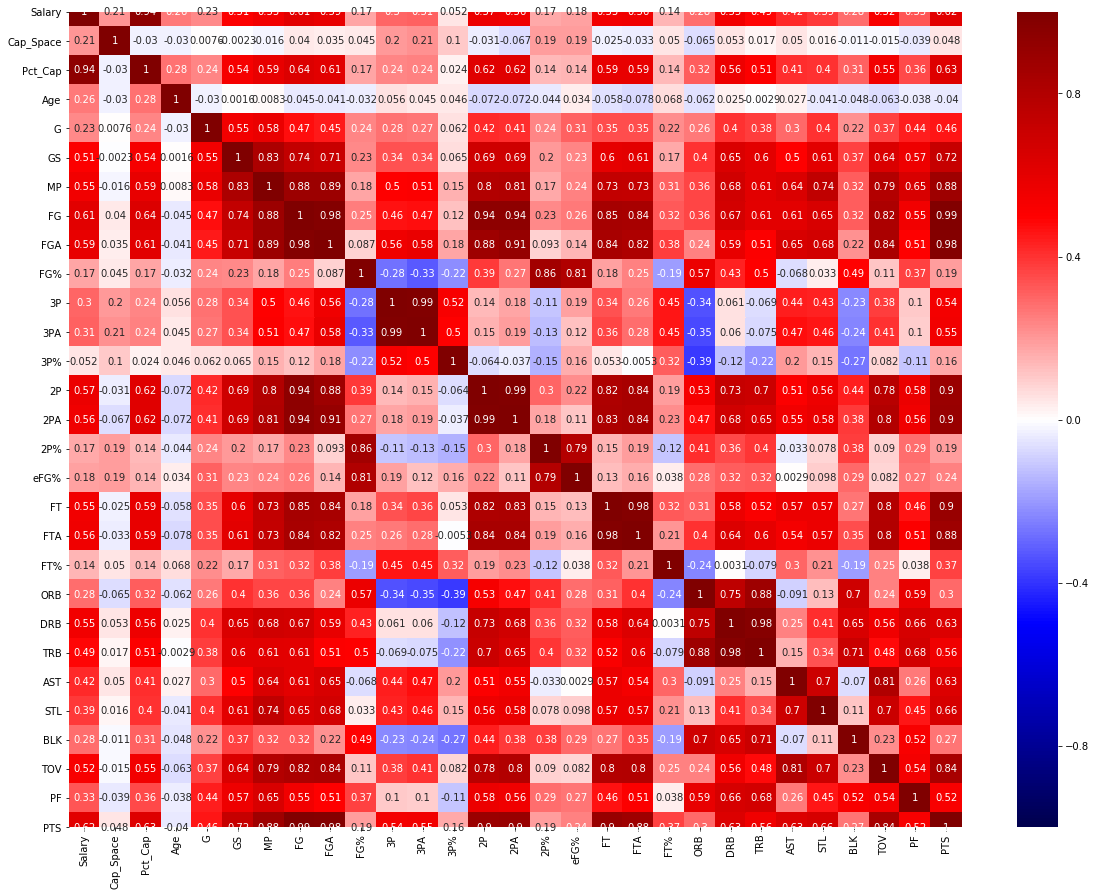

In [86]:
# heat map showing correlations between features.

plt.figure(figsize=(20,15))

sns.heatmap(merge_data.corr(), cmap="seismic", annot=True, vmin= -1, vmax=1);

In [87]:
#pair plot of all the features
sns.pairplot(merge_data, height=1.2, aspect=1.5);

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a258e4200> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1a258ec5f0> (for post_execute):


KeyboardInterrupt: 

In [254]:
# removed the features that have lower correlations to %salary cap

clean_data = merge_data.drop(['Salary', 'Cap_Space', 'Pos', '3PA', 'ORB', 'PF', 'FG%','3P', 
                             '3P%', '2P%', 'eFG%', 'FT%', 'TRB', 'TOV', 'Tm', 'G', 'GS', 'BLK'], axis = 1)

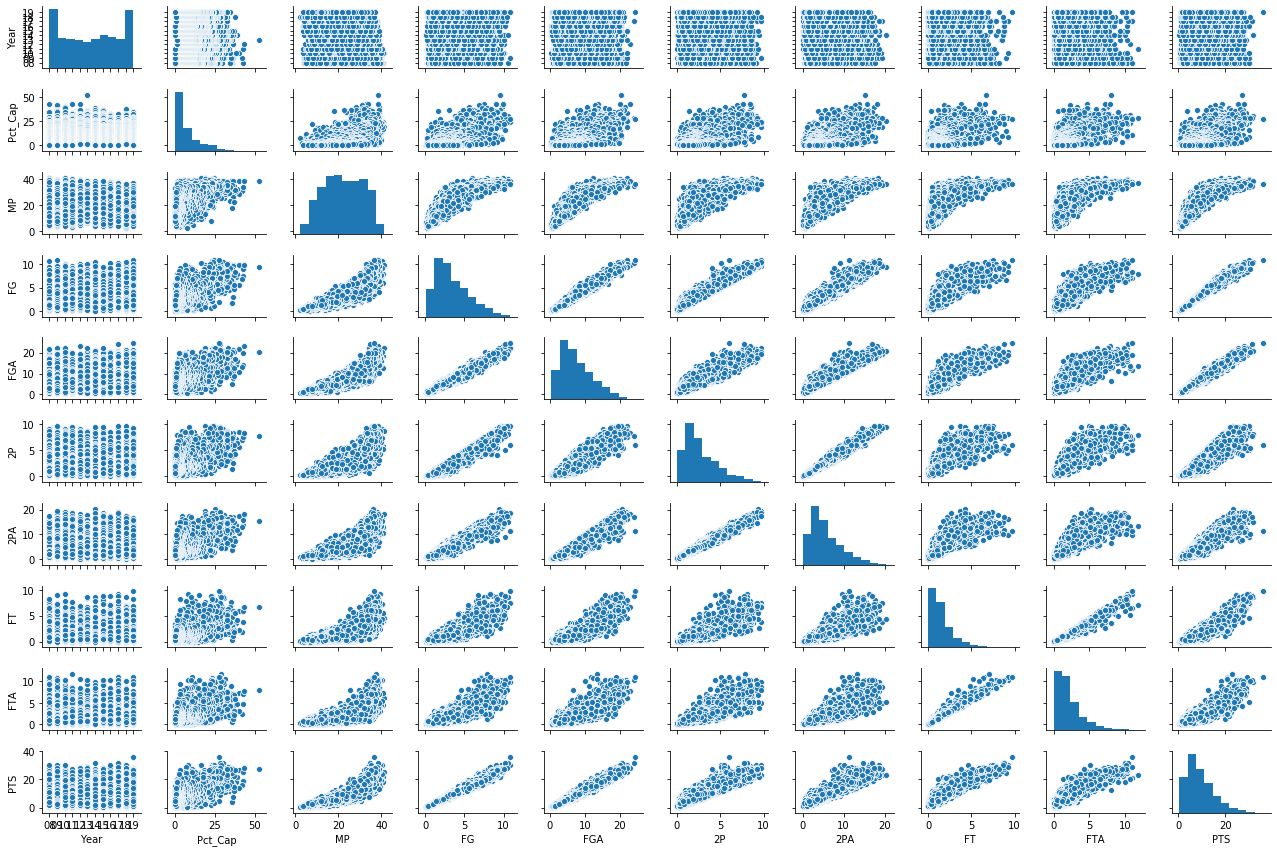

In [275]:
#pair plot of features that have higher correlation
sns.pairplot(clean_data, height=1.2, aspect=1.5);

In [255]:
#changing column name to something statsmodel can use
clean_data['two_pt'] = clean_data['2P']
clean_data['two_ptA'] = clean_data['2PA']

In [256]:
clean_data.drop(['2P', '2PA'], axis = 1)

Player Year    Pct_Cap  Age    MP   FG   FGA   FT  FTA  \
0               Kevin Garnett   08  42.696268   31  32.8  7.5  13.9  3.8  4.7   
1             Jermaine O'Neal   08  35.462880   29  28.7  5.4  12.2  2.9  3.9   
2                 Kobe Bryant   08  35.036177   29  38.9  9.5  20.6  7.6  9.0   
3                  Tim Duncan   08  34.179738   31  34.0  7.5  15.1  4.3  5.9   
4             Stephon Marbury   08  34.176703   30  33.5  4.6  11.0  3.5  4.8   
...                       ...  ...        ...  ...   ...  ...   ...  ...  ...   
4709         Cameron Reynolds   19   0.099829   23  13.6  1.7   4.1  0.4  0.5   
4712              Greg Monroe   19   0.054810   28  11.2  2.1   4.4  1.0  1.7   
4713  Michael Carter-Williams   19   0.054810   27  13.3  1.6   4.4  1.1  1.9   
4720             Jordan McRae   19   0.015661   27  12.3  2.3   4.8  1.0  1.3   
4722              Theo Pinson   19   0.004340   23  11.7  1.4   4.1  1.1  1.2   

      DRB  AST  STL   PTS  two_pt  two_ptA  
0     7.3  3.4  1.4  18.8     7.5     13.8  
1     4.8  2.2  0.5  13.6     5.4     12.1  
2     5.2  5.4  1.8  28.3     7.6     15.5  
3     8.3  2.8  0.7  19.3     7.5     15.1  
4     1.8  4.7  0.9  13.9     3.5      8.0  
...   ...  ...  ...   ...     ...      ...  
4709  1.4  0.7  0.3   5.0     0.6      1.4  
4712  2.4  0.6  0.3   5.3     2.1      4.3  
4713  1.8  2.5  0.7   4.8     1.3      3.0  
4720  1.3  1.1  0.5   5.9     1.9      3.5  
4722  1.8  1.2  0.3   4.5     0.7      1.5  

[4326 rows x 15 columns]

In [257]:
#look at correlation between features and Percent Cap
clean_data.corr()

Pct_Cap       Age        MP        FG       FGA        2P       2PA  \
Pct_Cap  1.000000  0.277600  0.592917  0.636111  0.614017  0.620866  0.617300   
Age      0.277600  1.000000  0.008300 -0.044790 -0.040847 -0.071711 -0.071726   
MP       0.592917  0.008300  1.000000  0.884559  0.889005  0.798104  0.812142   
FG       0.636111 -0.044790  0.884559  1.000000  0.979309  0.941663  0.941530   
FGA      0.614017 -0.040847  0.889005  0.979309  1.000000  0.881406  0.910489   
2P       0.620866 -0.071711  0.798104  0.941663  0.881406  1.000000  0.985695   
2PA      0.617300 -0.071726  0.812142  0.941530  0.910489  0.985695  1.000000   
FT       0.588078 -0.058266  0.734872  0.847240  0.837981  0.816953  0.827249   
FTA      0.593188 -0.077501  0.734084  0.840663  0.815220  0.839343  0.839032   
DRB      0.562755  0.024857  0.681805  0.670834  0.592741  0.726328  0.684462   
AST      0.413779  0.026969  0.642078  0.608190  0.653809  0.512092  0.549533   
STL      0.400979 -0.041497  0.743538  0.650212  0.675973  0.562557  0.582612   
PTS      0.632613 -0.039631  0.881117  0.987078  0.982056  0.897671  0.904654   
two_pt   0.620866 -0.071711  0.798104  0.941663  0.881406  1.000000  0.985695   
two_ptA  0.617300 -0.071726  0.812142  0.941530  0.910489  0.985695  1.000000   

               FT       FTA       DRB       AST       STL       PTS    two_pt  \
Pct_Cap  0.588078  0.593188  0.562755  0.413779  0.400979  0.632613  0.620866   
Age     -0.058266 -0.077501  0.024857  0.026969 -0.041497 -0.039631 -0.071711   
MP       0.734872  0.734084  0.681805  0.642078  0.743538  0.881117  0.798104   
FG       0.847240  0.840663  0.670834  0.608190  0.650212  0.987078  0.941663   
FGA      0.837981  0.815220  0.592741  0.653809  0.675973  0.982056  0.881406   
2P       0.816953  0.839343  0.726328  0.512092  0.562557  0.897671  1.000000   
2PA      0.827249  0.839032  0.684462  0.549533  0.582612  0.904654  0.985695   
FT       1.000000  0.982229  0.577179  0.572383  0.573485  0.898716  0.816953   
FTA      0.982229  1.000000  0.638792  0.540082  0.571090  0.880106  0.839343   
DRB      0.577179  0.638792  1.000000  0.247612  0.413664  0.633652  0.726328   
AST      0.572383  0.540082  0.247612  1.000000  0.698627  0.633942  0.512092   
STL      0.573485  0.571090  0.413664  0.698627  1.000000  0.663440  0.562557   
PTS      0.898716  0.880106  0.633652  0.633942  0.663440  1.000000  0.897671   
two_pt   0.816953  0.839343  0.726328  0.512092  0.562557  0.897671  1.000000   
two_ptA  0.827249  0.839032  0.684462  0.549533  0.582612  0.904654  0.985695   

          two_ptA  
Pct_Cap  0.617300  
Age     -0.071726  
MP       0.812142  
FG       0.941530  
FGA      0.910489  
2P       0.985695  
2PA      1.000000  
FT       0.827249  
FTA      0.839032  
DRB      0.684462  
AST      0.549533  
STL      0.582612  
PTS      0.904654  
two_pt   0.985695  
two_ptA  1.000000

In [258]:
#log transforming PTS 
clean_data['log_PTS'] = np.log(clean_data['PTS'])
clean_data['log_MP'] = np.log(clean_data['MP'])
clean_data['log_FGA'] = np.log(clean_data['FGA'])
clean_data['log_FG'] = np.log(clean_data['FG'])
clean_data['log_FT'] = np.log(clean_data['FT'])
clean_data['log_FTA'] = np.log(clean_data['FTA'])


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [201]:
# clean_data = clean_data[clean_data['log_PTS'] > 0]
# clean_data = clean_data[clean_data['log_MP'] > 0]
# clean_data = clean_data[clean_data['log_FGA'] > 0]
# clean_data = clean_data[clean_data['log_FG'] > 0]
# clean_data = clean_data[clean_data['log_FT'] > 0]
# clean_data = clean_data[clean_data['log_FTA'] > 0]

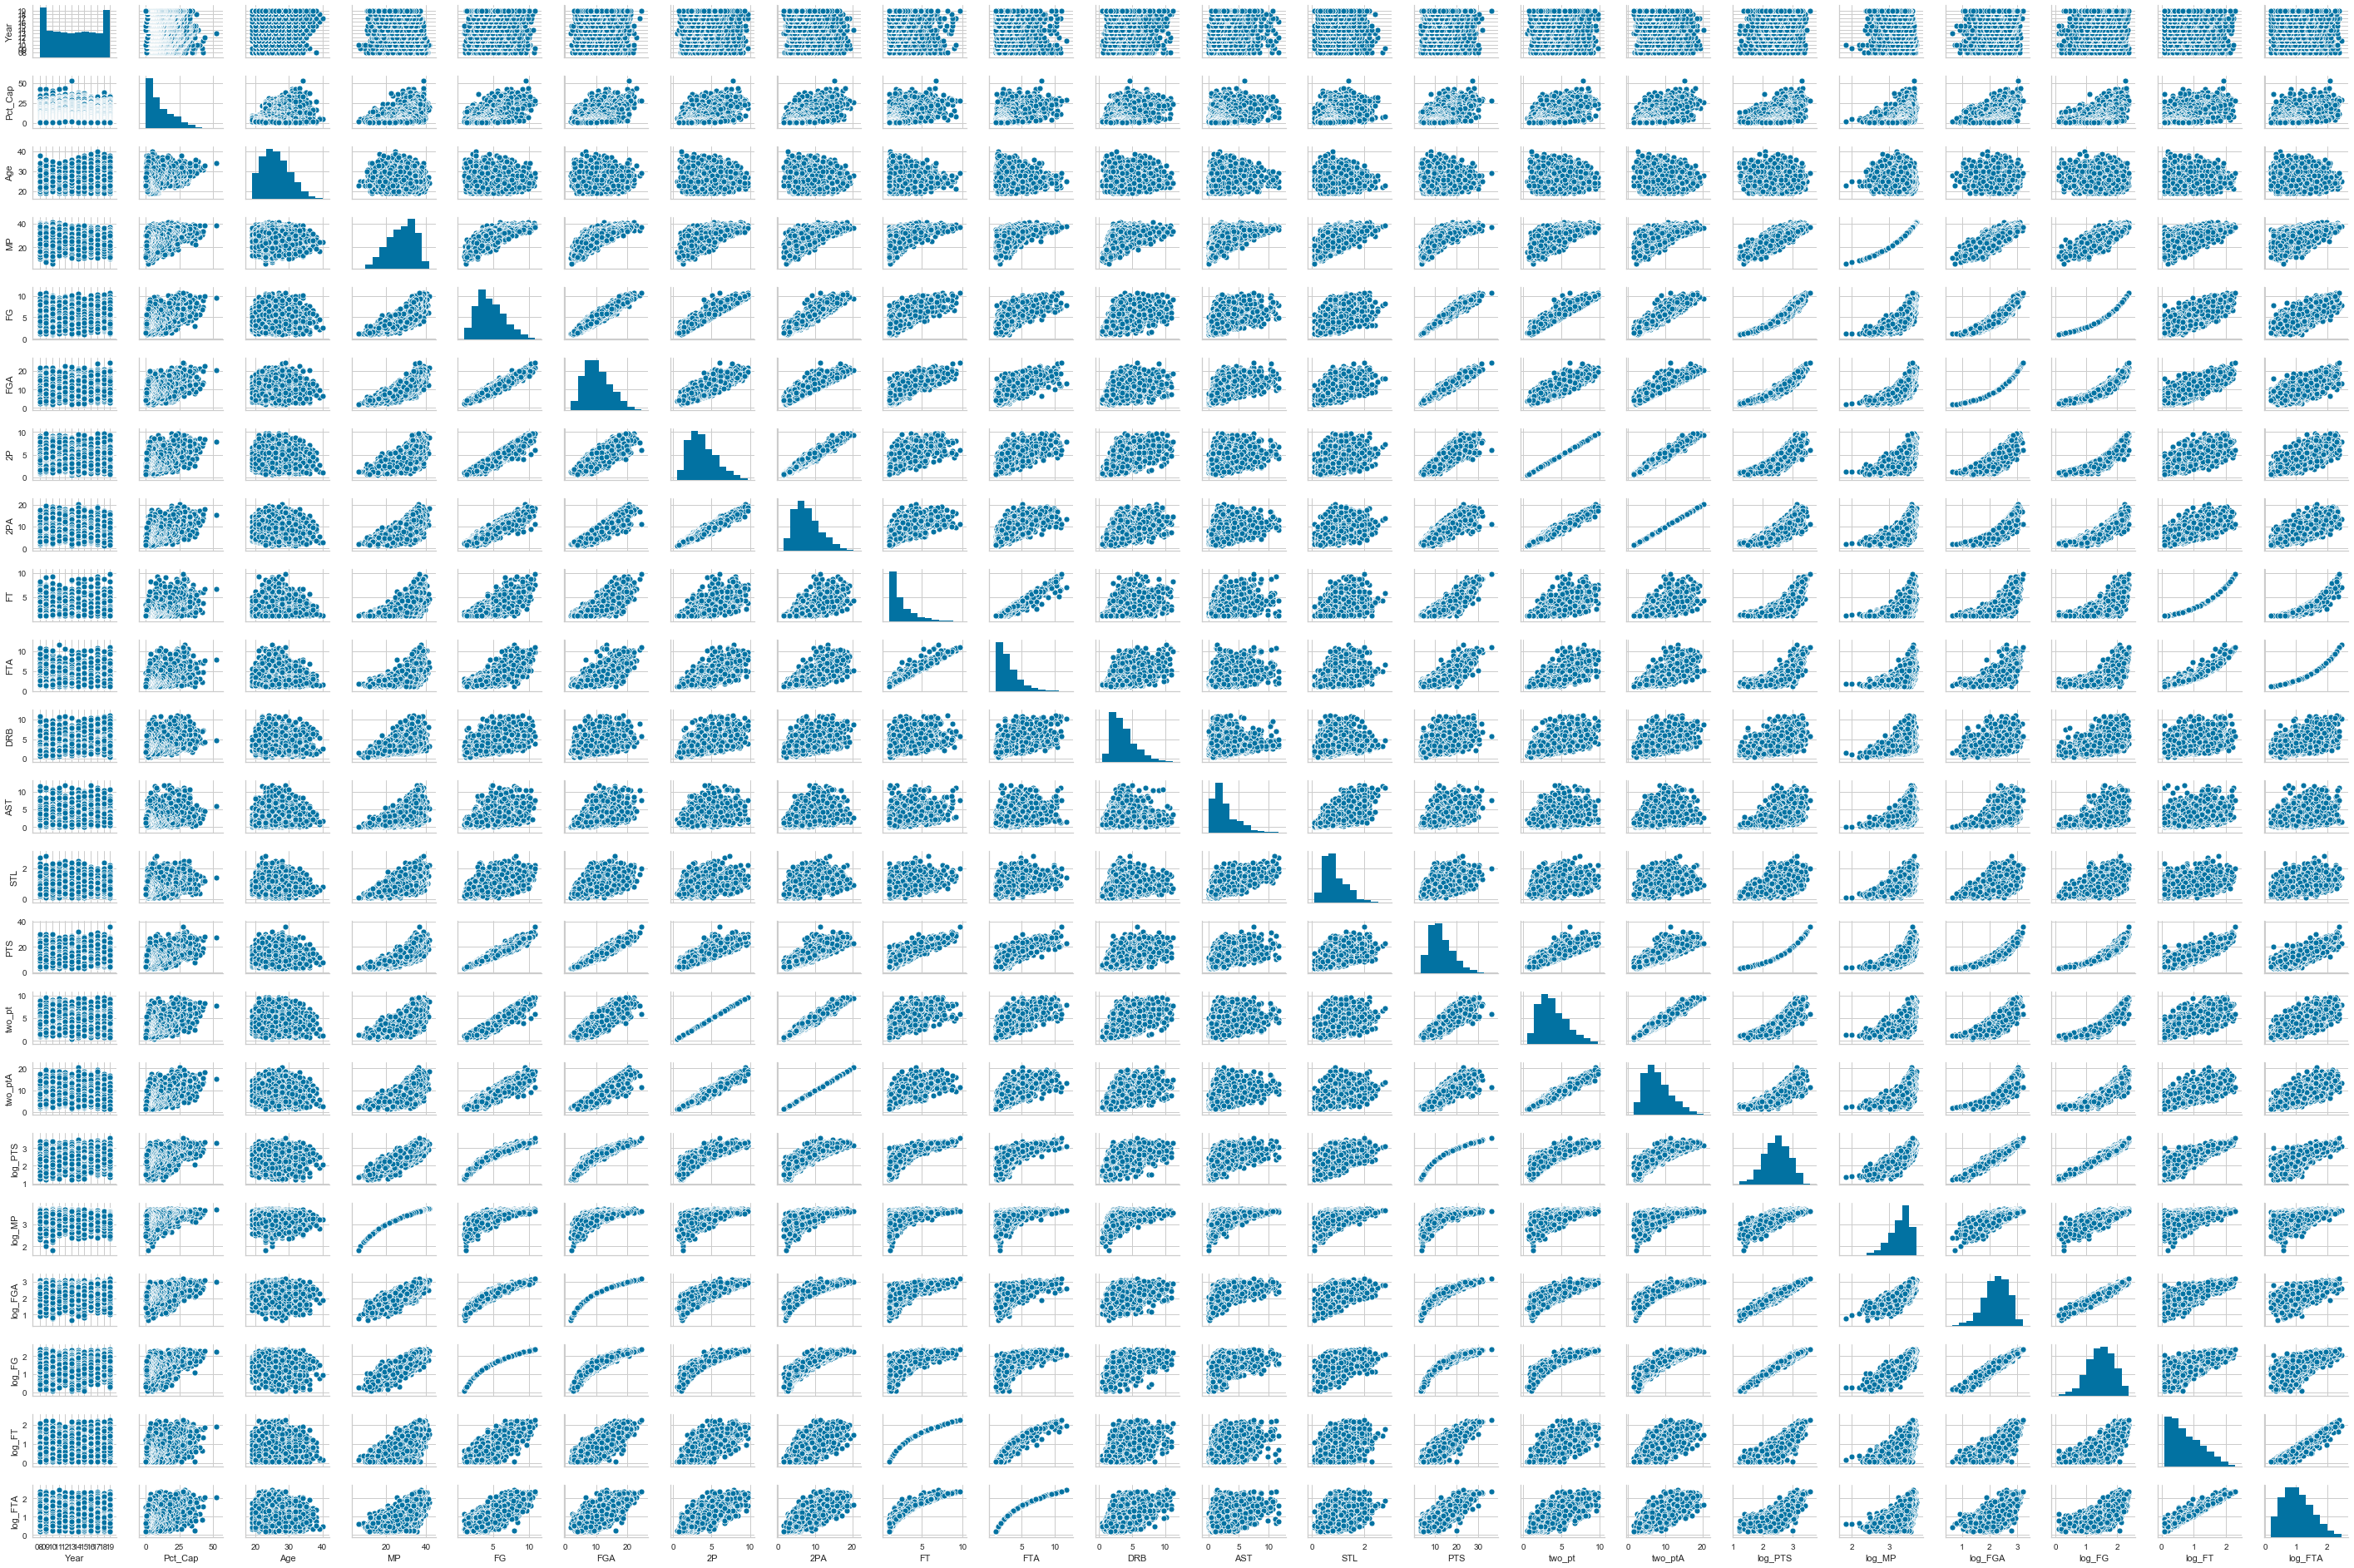

In [202]:
sns.pairplot(clean_data, height=1.2, aspect=1.5);

In [259]:
clean_data.max()

Player     Zydrunas Ilgauskas
Year                       19
Pct_Cap               52.4668
Age                        42
MP                       41.4
FG                       10.8
FGA                      24.5
2P                        9.7
2PA                      20.4
FT                        9.7
FTA                      11.7
DRB                      11.1
AST                      11.7
STL                       2.8
PTS                      36.1
two_pt                    9.7
two_ptA                  20.4
log_PTS               3.58629
log_MP                3.72328
log_FGA               3.19867
log_FG                2.37955
log_FT                2.27213
log_FTA               2.45959
dtype: object

In [260]:
# if there is empty stats that means the player didn't take any shots that year. so fill with 0
empty = ['MP', 'FG', 'FGA', 'FT', 'FTA', 'PTS','log_PTS', 'log_MP', 'log_FGA', 'log_FT', 'log_FTA','AST', 'STL']
for i in empty:
    clean_data[i].fillna(0, inplace = True)

In [261]:
#quick check of summary using stats model OLS

lml = smf.ols('Pct_Cap ~ MP + FG + FGA + FT + FTA + PTS', data=clean_data)
fit = lml.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Pct_Cap   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     532.1
Date:                Thu, 16 Apr 2020   Prob (F-statistic):               0.00
Time:                        18:14:29   Log-Likelihood:                -13864.
No. Observations:                4326   AIC:                         2.774e+04
Df Residuals:                    4319   BIC:                         2.779e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5159      0.271     -5.599      0.000      -2.047      -0.985
MP             0.1666      0.023      7.210      0.000       0.121       0.212
FG             2.9877      0.371      8.051      0.000       2.260       3.715
FGA           -0.3293      0.132     -2.487      0.013      -0.589      -0.070
FT             0.9436      0.484      1.949      0.051      -0.006       1.893
FTA            0.4946      0.324      1.525      0.127      -0.141       1.130
PTS           -0.5305      0.191     -2.780      0.005      -0.905      -0.156
==============================================================================
Omnibus:                      594.382   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1180.769
Skew:                           0.852   Prob(JB):                    3.98e-257
Kurtosis:                       4.910   Cond. No.                         196.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
# check VIF to look for multicollinearity, remove two_pt, two_ptA because they have high VIF and can be captured by PTS
x = clean_data[['log_PTS', 'AST', 'Age', 'FT', 'DRB', 'STL']]
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif.round(1)

VIF_Factor features
0        25.9  log_PTS
1         5.1      AST
2         9.0      Age
3         6.3       FT
4         6.9      DRB
5         9.0      STL

In [263]:
# cross-validation Regular


y = clean_data[['Pct_Cap']]
X = clean_data.loc[:,['AST', 'Age', 'FT', 'DRB', 'log_PTS', 'STL']]

linreg = LinearRegression()

#split to 80 train and 20 test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 


#cross validate model
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

print('R^2:', np.mean(cross_val_score(linreg, X_train, y_train, cv=kf, scoring='r2')))


R^2: 0.5089245526559641


In [264]:
#Standard-scaling features
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)

In [265]:
# cross-validation LASSO


#look for best alpha for LASSO
alphavec = 10**np.linspace(-2,2,200) 

#split tests into 5 parts
kf = KFold(n_splits=5, shuffle=True, random_state = 42) 

lasso_model = LassoCV(alphas = alphavec, cv=5) 
lasso_model.fit(X_tr, y_train)

best_lasso_alpha = lasso_model.alpha_
print('Best alpha value for LASSO:' + str(best_lasso_alpha))

#uses the best alpha to fit the model
lasso_model = Lasso(alpha= best_lasso_alpha) 

#cross validation
scores = cross_val_score(lasso_model, X_tr, y_train, cv=kf, scoring='r2')

lasso_model.fit(X_tr, y_train)



print('R^2', np.mean(scores))



Best alpha value for LASSO:0.01
R^2 0.5074083669036907


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [266]:
# cross-validation Ridge

alphavec = 10**np.linspace(-2,2,200)

kf = KFold(n_splits=5, shuffle=True, random_state = 42)

ridge_model = RidgeCV(alphas=alphavec, cv = 5)
ridge_model.fit(X_tr, y_train)

best_ridge_alpha = ridge_model.alpha_
print('Best alpha value for LASSO:' + str(best_ridge_alpha))

ridge_model = Ridge(alpha = best_ridge_alpha)

scores = cross_val_score(ridge_model, X_tr, y_train, cv=kf, scoring='r2')

ridge_model.fit(X_tr, y_train)

y_pred = ridge_model.predict(X_te)

print('R-squared CV',np.mean(scores))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R-squared:', metrics.r2_score(y_test, y_pred))




Best alpha value for LASSO:19.791668678535572
R-squared CV 0.5074539945979233
Mean Absolute Error: 4.103113468170119
R-squared: 0.5393090783668897


In [267]:
# After picking model: Ridge is the best. It has the highest R^2 value. 
# create df to compare actual vs predicted 
ridge_df = pd.DataFrame(y_test)

In [268]:
ridge_df['Actual'] = ridge_df['Pct_Cap']

In [269]:
ridge_df['Predicted'] = y_pred

In [270]:
ridge_df.drop(['Pct_Cap'], axis = 1)

Actual  Predicted
2534   2.758534   1.213174
887   11.265165   7.570745
3381   2.606229  -1.786952
3832   1.810140  -1.141755
1833   3.260079   0.890474
...         ...        ...
1551   1.313133   6.159181
1610  26.715306  21.789827
3719   5.649186   8.980237
1346   6.891324   6.275297
4375  12.369777   8.910425

[866 rows x 2 columns]

In [280]:
len(ridge_df['Predicted'])

866

In [271]:
# making a residuals column
ridge_df['Residual'] = ridge_df['Actual'] - ridge_df['Predicted']

(array([-20., -10.,   0.,  10.,  20.,  30.]),
 <a list of 6 Text yticklabel objects>)

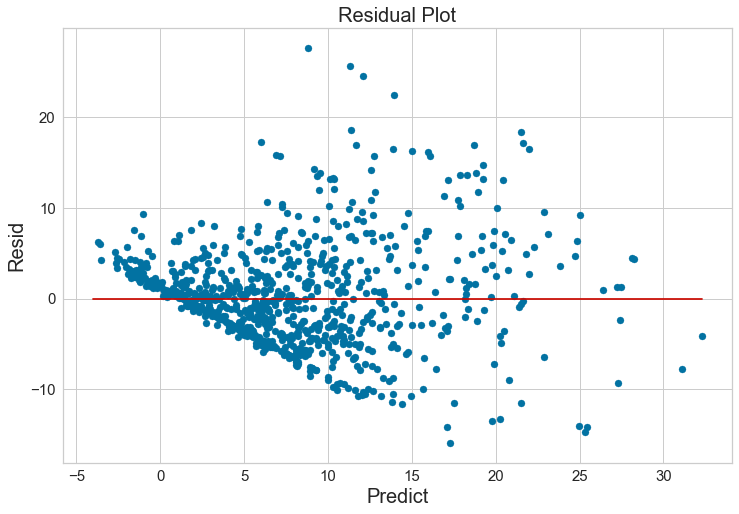

In [272]:
#plotting the predicted values on x-axis and residuals on y-axis
plt.figure(figsize=(12,8))
plt.scatter(ridge_df['Predicted'], ridge_df['Residual'])
plt.plot([-4, max(ridge_df['Predicted'])], [0,0], linestyle='-', color='r')
plt.xlabel('Predict', fontsize= 20)
plt.ylabel('Resid', fontsize = 20)
plt.title('Residual Plot', fontsize= 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

Text(0.5, 1.0, 'Predicted vs Actual for Percent Salary Cap')

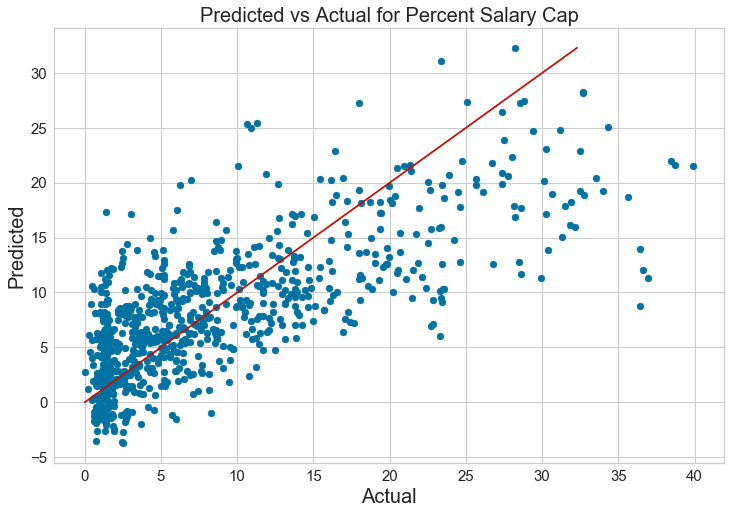

In [273]:
#plot the actual vs predicted values
plt.figure(figsize=(12,8))
plt.scatter(ridge_df['Actual'], ridge_df['Predicted'])
plt.plot([0, max(ridge_df['Predicted'])], [0, max(ridge_df['Predicted'])], color = 'r');
plt.xlabel('Actual', fontsize = 20)
plt.ylabel('Predicted', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Predicted vs Actual for Percent Salary Cap', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Predicted Value')

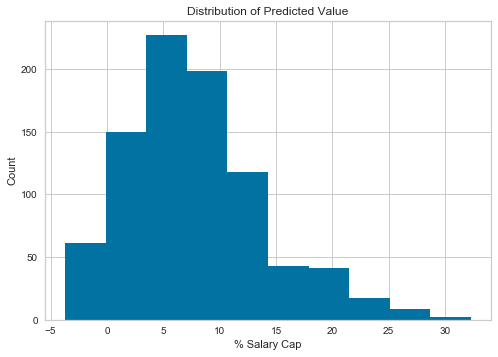

In [274]:
# distribution of predicted values
ridge_df['Predicted'].hist()
plt.xlabel('% Salary Cap')
plt.ylabel('Count')
plt.title('Distribution of Predicted Value')

Text(0.5, 1.0, 'Distribution of Actual Value')

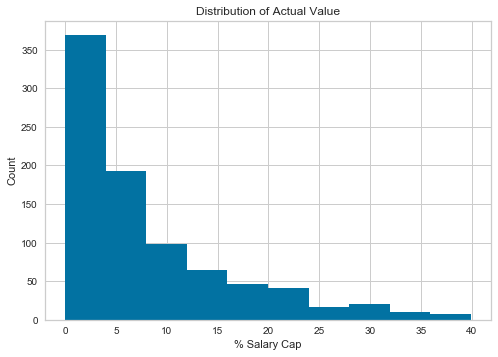

In [275]:
# distribution of actual values
ridge_df['Actual'].hist()
plt.xlabel('% Salary Cap')
plt.ylabel('Count')
plt.title('Distribution of Actual Value')